Table of contents:

[Repository and batch information](#repository-and-batch-information)

[Query data](#query-data)
  - [Make queries](#make-queries)
  - [Query and rename columns](#query-and-rename-columns)
  - [Query initial parameters](#query-initial-parameters)
  - [Data features](#data-features)
    - [Maximum and minimum values](#maximum-and-minimum-values)
    - [Maximum height](#maximum-height)
    - [Maximum flight range](#maximum-flight-range)
    - [Unique values](#unique-values)
    - [Number of unique values](#number-of-unique-values)

[Plots](#plots)
  - [Quick plots](#quick-plots)
    - [Quick x vs. y plot](#quick-x-vs.-y-plot)
    - [Time plot](#time-plot)

  - [Advanced plots](#advanced-plots)
    - [x vs. y plot](#x-vs.-y-plot)
    - [Subplots with a shared x-axis](#subplots-with-a-shared-x-axis)
    - [Ellipse error plot](#ellipse-error-plot)

[Statistics](#statistics)

[Correlation](#correlation)

[Validation](#validation)
  - [Check velocity standard deviation boundary](#check-velocity-standard-deviation-boundary)
  - [Check velocity standard deviation](#check-velocity-standard-deviation)
  - [Check mean velocity value](#check-mean-velocity-value)
  - [Check velocity of each simulation](#check-velocity-of-each-simulation)
  - [Check maximum distance](#check-maximum-distance)

The batch 'cannon_simulation_run' contains 10 simulations. 
For initial parameters, each simulation is assigned a unique initial angle, chosen from a normal distribution with a 
mean of 45 and a standard deviation of 15. The initial speed varies slightly: it's set to 50 for the first 
simulation and then increases uniformly by 1 for each subsequent simulation. Let's define the variable with the name of this batch as `my_batch`:

In [1]:
import os
print("report info")
print(os.getenv("REPORT_NANE"))
print(os.getenv("REPORT_MESSAGE"))
print(os.getenv("REPORT_VERSION"))

print("batch info")
print(os.getenv("BATCH_SIMULATION"))
print(os.getenv("BATCH_NAME"))
print(os.getenv("BATCH_VERSION"))
print(os.getenv("BATCH_MESSAGE"))

my_simulation = os.getenv("BATCH_SIMULATION","simulation_cannon_analytic")
my_batch = os.getenv("BATCH_NAME","citros")

report info
None
None
None
batch info
None
None
None
None


Download the `data_access` module, which allows you to retrieve general information about the repositories and batches, as well as query and visualize data:

In [2]:
from citros import CitrosDB
citros = CitrosDB()

To get general information about the batch content, execute `info()` method. 

It returns dictionary, that contains:
   - 'size': size of the selected data
   - 'sid_count': number of sids
   - 'sid_list': list of the sids
   - 'topic_count': number of topics
   - 'topic_list': list of topics
   - 'message_count': number of messages

Show information about topics of the batch 'cannon_simulation_run':

In [3]:
citros.simulation(my_simulation).batch(my_batch).info().print()

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


{
}


We see that 'cannon_simulation_run' contains 10 simulations and 3 topics. 
The data is stored under '/cannon/state' topic.

Let's show information for the topic '/cannon/state':

In [4]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info().print()

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


{
}


Let's display only information about the data structure:

In [5]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info()['topics']['/cannon/state']['data_structure'].print()

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info()['topics']     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'topics'

The initial parameters are stored in the '/config' topic. Typically, one topic corresponds to a single type. 
However, certain topics, like '/config', can encompass multiple types. 
Within '/config', each simulation scenario assigns a unique type to every simulation run (represented by each 'sid'). 
These types can be found under the 'type' keyword.

Furthermore, some types can vary in their data structure. 
Consequently, types are categorized based on their data structure and are labeled as 'type_group_0', 'type_group_1', and so forth.

Let's examine the '/config' topic in the 'cannon' repository as an example. 
Here, some type groups have differing data structures, yet they all correspond to the single '/config' topic:

In [6]:
citros.simulation(my_simulation).batch(my_batch).topic('/config').info().print()

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


{
}


## Query data

### Make queries

To query batch the method `data()` is used. The output is a pandas.DataFrame.

The simulated data is always written in 'data' column of the batch and has a json format. That means that it either contains json objects 
(in python correspond to dict format) or json arrays (which are correspond to list in python). Also they can be nested one into another.

As it can be seen from the previous output, column 'data' has two json objects: 'data.data' and 'data.\_\_msgtype__'.
Let's get values from 'data.data':

In [7]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data('data.data').head(5)

#As the output is a pandas.DataFrame, all its methods can be applied. The method head(n) retains only the first n rows

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data('data.data'     │
│   2                                                                                              │
│   3 #As the output is a pandas.DataFrame, all its methods can be applied. The method head(n)     │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'head'

To get data from several json objects, pass them as a list to `data()` method:

In [8]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(['data.data', 'data.__msgtype__']).head(5)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(['data.data     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'head'

When the `data()` method is called without any arguments, the entire content of the 'data' column is downloaded, 
with each json object separated into individual columns. 
Since there are only two json objects, the result will be identical to the previous case where the labels were explicitly 
listed and passed as an argument:

In [9]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data().head(5)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data().head(5)       │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'head'

As mentioned in the 'cannon' repository description, the outcome of the simulation is an array of two coordinates and two velocities:
['position_x', 'position_y', 'velocity_x', 'velocity_y'].
To get, for example, only data corresponding to position_x, specify index 0:

In [10]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data('data.data[0]').head(5)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data('data.data[     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'head'

To get only velocities, velocity_x and velocity_y:

In [11]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(['data.data[2]','data.data[3]']).head(5)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(['data.data     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'head'

To get data only for specific simulations, indicate them by `sid()` method before calling `data()`. 
For example, to get position_y data only for simulations 2 and 3:

In [12]:
citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid([0, 2]).data('data.data[1]')

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


See the [documentation](https://citros.io/doc/docs_data_analysis) of the **citros_data_analysis** package to learn more 
about possible constraints and sampling methods that may be applied during querying.

### Query and rename columns

Let's retrieve data on positions and velocities, separate the array content into individual columns, and assign appropriate names to the columns
 of the resulting pandas.DataFrame:

In [13]:
column_names = ['position_x', 'position_y', 'velocity_x', 'velocity_y']
query = ['data.data['+str(i)+']' for i in range(len(column_names))]

F = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(query)
F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = True)

print(F)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 query = ['data.data['+str(i)+']' for i in range(len(column_names))]                          │
│   3                                                                                              │
│   4 F = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(query)      │
│ ❱ 5 F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = Tru     │
│   6                                                                                              │
│   7 print(F)                                                                                     │
│   8                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'rename'

### Query initial parameters

As it was stated at the beggining of the notebook, batch `my_batch` was created in cannon_analytic simulation, where the initial angle was 
chosen randomly around 45 degrees and the initial velocity was increased by one each simulation, starting at 50.
To get table with the initial parameters for cannon_analytic the following steps may be executed:

In [14]:

init_param = citros.simulation(my_simulation).batch(my_batch).topic('/config').data()
print(init_param)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


None


## Data features

### Maximum and minimum values

For the simulation with sid = 0, let's determine the maximum and minimum values of 'position_y', which corresponds to the 'data.data[1]' column:

In [15]:
column_name = 'data.data[1]'

result_max = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(0).get_max_value(column_name)
result_min = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(0).get_min_value(column_name)

print(f"for sid = 0 max value of the column '{column_name}' : {result_max}")
print(f"for sid = 0 min value of the column '{column_name}' : {result_min}")

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.
ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


for sid = 0 max value of the column 'data.data[1]' : (None, None, None)
for sid = 0 min value of the column 'data.data[1]' : (None, None, None)


### Maximum height

Let's find the simulation, in which the maximum height is achieved and print the sid of the simulation, 
x coordinate when the maximum height is approached and the initial parameters of this simulation from table `init_param`, 
that we obtained in [Query initial parameters](#query-initial-parameters):

In [16]:
column_name = 'data.data[1]'

#set return_index = True to get the sid and rid of the max/min value
result_max, sid_max, rid_max = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').get_max_value(column_name, return_index = True)
# print(result_max, sid_max, rid_max)

x = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(sid_max).rid(rid_max).data('data.data[0]')['data.data[0]'].iloc[0]

init_angle = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__parameters.init_angle']
init_speed = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__parameters.init_speed']
print(f"The maximum height is achieved in simulation {sid_max} at x = {x}")
print(f"the initial parameters are:\ninitial angel = {init_angle},\ninitial speed = {init_speed}")

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.
ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 result_max, sid_max, rid_max = citros.simulation(my_simulation).batch(my_batch).topic('/    │
│    5 # print(result_max, sid_max, rid_max)                                                       │
│    6                                                                                             │
│ ❱  7 x = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(sid_max)    │
│    8                                                                                             │
│    9 init_angle = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__param    │
│   10 init_speed = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__param    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'NoneType' object is not subscriptable

### Maximum flight range

Let's find the simulation in which the maximum range of flight is achieved:

In [17]:
column_name = 'data.data[0]'

#set return_index = True to get the sid and rid of the max/min value
result_max, sid_max, rid_max = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').get_max_value(column_name, return_index = True)

init_angle = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__parameters.init_angle']
init_speed = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__parameters.init_speed']
print(f"The maximum flight range is achieved in simulation {sid_max}")
print(f"the initial parameters are:\ninitial angel = {init_angle},\ninitial speed = {init_speed}")

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:6                                                                                    │
│                                                                                                  │
│    3 #set return_index = True to get the sid and rid of the max/min value                        │
│    4 result_max, sid_max, rid_max = citros.simulation(my_simulation).batch(my_batch).topic('/    │
│    5                                                                                             │
│ ❱  6 init_angle = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__param    │
│    7 init_speed = init_param.set_index('sid').loc[sid_max]['data.analytic_dynamics.ros__param    │
│    8 print(f"The maximum flight range is achieved in simulation {sid_max}")                      │
│    9 print(f"the initial parameters are:\ninitial angel = {init_angle},\ninitial speed = {ini    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'set_index'

### Unique values

Print unique values by `get_unique_values()`. For example, one of the way to show all possible topics for the batch is the following:

In [18]:
column_names = 'topic'
result = citros.simulation(my_simulation).batch(my_batch).get_unique_values(column_names)

print(result)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


None


To get unique combination of values, specify their labels as a list.
For example, to get unique combination of topic-type for the first simulation and print them as a table:

In [19]:
column_names = ['topic', 'type']
result = citros.simulation(my_simulation).batch(my_batch).sid(0).get_unique_values(column_names)

#print the result
from prettytable import PrettyTable
table = PrettyTable(field_names=column_names, align='r')
table.add_rows(result)
print(table)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│   4 #print the result                                                                            │
│   5 from prettytable import PrettyTable                                                          │
│   6 table = PrettyTable(field_names=column_names, align='r')                                     │
│ ❱ 7 table.add_rows(result)                                                                       │
│   8 print(table)                                                                                 │
│   9                                                                                              │
│                                                                                                  │
│ /opt/homebrew/lib/python3.11/site-packages/prettytable/prettytable.py:1395 in add_rows           │
│                                                                                                  │
│   1392 │   │                                                                                     │
│   1393 │   │   rows - rows of data, should be an iterable of lists, each list with as many       │
│   1394 │   │   elements as the table has fields"""                                               │
│ ❱ 1395 │   │   for row in rows:                                                                  │
│   1396 │   │   │   self.add_row(row)                                                             │
│   1397 │                                                                                         │
│   1398 │   def add_row(self, row, *, divider=False) -> None:                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'NoneType' object is not iterable

### Number of unique values

Print number of the unique values in the column "type" for the first simulation:

In [20]:
#name of the column:
column_name = 'type'

counts = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid([0]) .get_unique_counts(column_name)
print(f"number of unique values in column '{column_name}' for topic '/cannon/state': {counts[0][0]}")

#you may group the result, for example by topics:
group_by = 'topic'
counts = citros.simulation(my_simulation).batch(my_batch).sid([0]).get_unique_counts(column_name, group_by = group_by)

print(f"number of unique values in column '{column_name}':")
table = PrettyTable(field_names= [group_by, 'unique_counts'], align='r')
table.add_rows(counts)
table.border = False
print(table)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 column_name = 'type'                                                                        │
│    3                                                                                             │
│    4 counts = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid([0]    │
│ ❱  5 print(f"number of unique values in column '{column_name}' for topic '/cannon/state': {co    │
│    6                                                                                             │
│    7 #you may group the result, for example by topics:                                           │
│    8 group_by = 'topic'                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'NoneType' object is not subscriptable

## Plots

### Quick plots

May be used to take a quick look on data without saving it.

#### Quick x vs. y plot

Plot 'position_y' vs. 'position_x' for sids = 1 and 2:

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


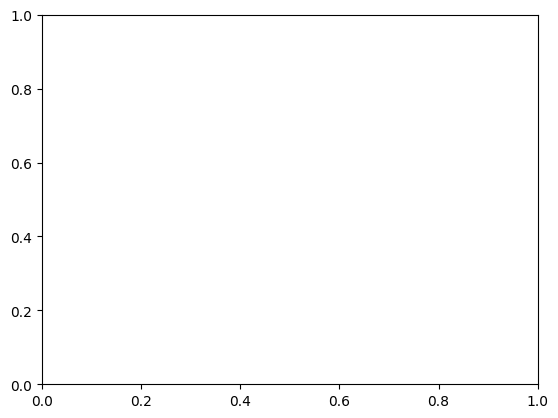

In [21]:
#import matplotlib
import matplotlib.pyplot as plt

#create a figure to plot on
fig, ax = plt.subplots()

citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid([0,1,2]).\
        xy_plot(ax, var_x_name = 'data.data[0]',var_y_name = 'data.data[1]',
                x_label = 'x', y_label = 'y', title_text = 'y vs. x')

#### Time plot

In the 'cannon' example, the simulation results are recorded at intervals defined by the `dt` parameter, 
which is established in the setup. By multiplying the simulation step, 'rid', by `dt`, we can create a time scale.

For the 'cannon_simulation_run' batch, the value of `dt` is set to 0.01.

Then, to plot 'y' against time, proceed as follows:

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


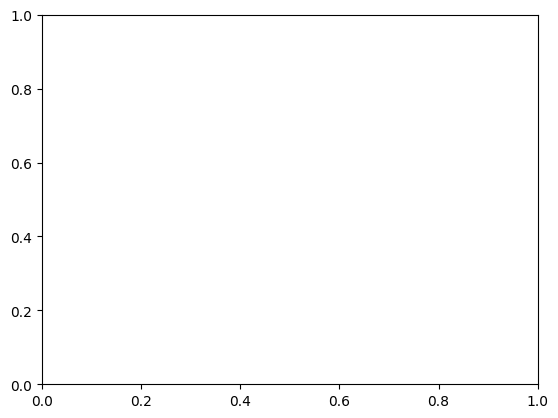

In [22]:
#import matplotlib
import matplotlib.pyplot as plt

#create a figure to plot on
fig, ax = plt.subplots()

citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid([0,1,2,3,4]).\
       time_plot(ax, var_name = 'data.data[1]', time_step = 0.01, y_label = 'y', title_text = 'y vs. t')

### Advanced plots

In all the following examples the matplotlib.Figure and matplotlib.Axes are returned, that may be used for further plotting.

Let's query data and label columns in the same way as it was done [previously](#query-and-rename-columns).
Let's also costruct a new column 't' based on 'rid' that represents time, as it was discussed [here](#time-plot).

In [23]:
column_names = ['position_x', 'position_y', 'velocity_x', 'velocity_y']
query = ['data.data['+str(i)+']' for i in range(len(column_names))]

F = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(query)
F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = True)

dt = 0.01
F['t'] = F['rid']*dt

print(F.head(5))

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 query = ['data.data['+str(i)+']' for i in range(len(column_names))]                         │
│    3                                                                                             │
│    4 F = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(query)     │
│ ❱  5 F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = Tru    │
│    6                                                                                             │
│    7 dt = 0.01                                                                                   │
│    8 F['t'] = F['rid']*dt                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'rename'

#### x vs. y plot

Let's plot y vs. x. Check if the simulations ids when the the maximum height and maximum flight range are achieved are the same, 
as we determined previously in [Maximum height](#maximum-height) and [Maximum flight range](#maximum-flight-range) sections.

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 fig, ax = citros.plot_graph(F, 'position_x', 'position_y', '-')                              │
│   2 ax.set_title('y vs. x')                                                                      │
│   3                                                                                              │
│                                                                                                  │
│ /Users/vovacooper/dev/github/lulav-citros/cli/citros/data/access/citros_db.py:1942 in plot_graph │
│                                                                                                  │
│   1939 │   │   ![plot_graph_2](../../img_documentation/plot_graph_2.png "plot_graph_2")          │
│   1940 │   │   """                                                                               │
│   1941 │   │   plotter = _Plotter(self.log)                                                      │
│ ❱ 1942 │   │   return plotter.plot_graph(                                                        │
│   1943 │   │   │   df,                                                                           │
│   1944 │   │   │   x_label,                                                                      │
│   1945 │   │   │   y_label,                                                                      │
│                                                                                                  │
│ /Users/vovacooper/dev/github/lulav-citros/cli/citros/data/access/_plotter.py:86 in plot_graph    │
│                                                                                                  │
│     83 │   │   │   fig, ax = plt.subplots(figsize=(6, 6))                                        │
│     84 │   │                                                                                     │
│     85 │   │   if remove_nan:                                                                    │
│ ❱   86 │   │   │   flag = df[x_label].notna() & df[y_label].notna()                              │
│     87 │   │   else:                                                                             │
│     88 │   │   │   flag = pd.Series(data=[True] * len(df))                                       │
│     89 │   │   if inf_vals is not None:                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'NoneType' object is not subscriptable

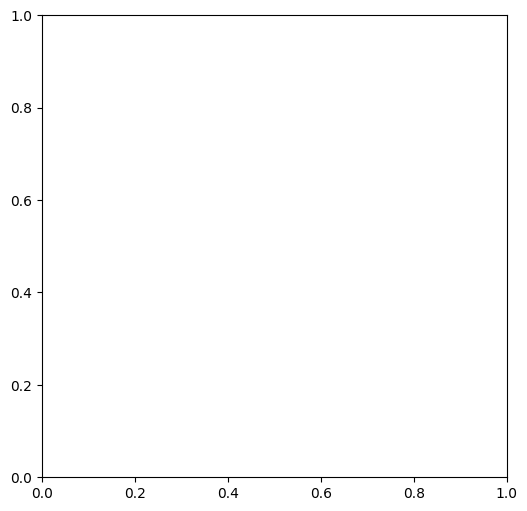

In [24]:
fig, ax = citros.plot_graph(F, 'position_x', 'position_y', '-')
ax.set_title('y vs. x')

#### Subplots with a shared x-axis

Plot 'position_y' vs 't' and 'velosity_y' vs. 't' on adjacent panels on one figure:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 fig, ax = citros.multiple_y_plot(F, "t", ["position_y", "velocity_y"], '-',                  │
│   2 │   │   │   legend = True, title = 'y coordinate and y velocity vs. t', set_x_label = 't     │
│   3                                                                                              │
│                                                                                                  │
│ /Users/vovacooper/dev/github/lulav-citros/cli/citros/data/access/citros_db.py:2152 in            │
│ multiple_y_plot                                                                                  │
│                                                                                                  │
│   2149 │   │   ![multiple_y_plot_2](../../img_documentation/multiple_y_plot_2.png "multiple_y_p  │
│   2150 │   │   """                                                                               │
│   2151 │   │   plotter = _Plotter(self.log)                                                      │
│ ❱ 2152 │   │   return plotter.multiple_y_plot(                                                   │
│   2153 │   │   │   df,                                                                           │
│   2154 │   │   │   x_label,                                                                      │
│   2155 │   │   │   y_labels,                                                                     │
│                                                                                                  │
│ /Users/vovacooper/dev/github/lulav-citros/cli/citros/data/access/_plotter.py:351 in              │
│ multiple_y_plot                                                                                  │
│                                                                                                  │
│    348 │   │                                                                                     │
│    349 │   │   missing_col = False                                                               │
│    350 │   │   for col in ["sid", "rid"]:                                                        │
│ ❱  351 │   │   │   if col not in df.columns:                                                     │
│    352 │   │   │   │   missing_col = True                                                        │
│    353 │   │   │   │   self.log.error(f'column "{col}" must be in the DataFrame `df`')           │
│    354 │   │   if missing_col:                                                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'columns'

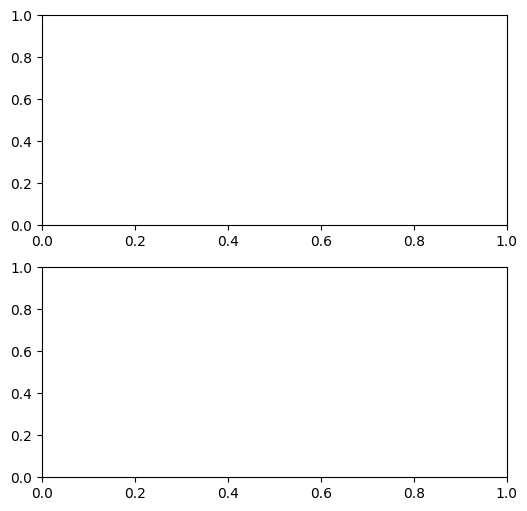

In [25]:
fig, ax = citros.multiple_y_plot(F, "t", ["position_y", "velocity_y"], '-', 
            legend = True, title = 'y coordinate and y velocity vs. t', set_x_label = 'time', set_y_label = ['y','v_y'])

### Ellipse error plot

Plot error ellipse for the initial values of the velocities:

In [26]:
x = 'data.data[2]'
label_x = 'velocity_x'
y = 'data.data[3]'
label_y = 'velocity_y'

#get all possible sid:
sid_list = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info()['sid_list']
#or using get_unique_values() method:
# sid_list = citros.batch(my_batch).topic('/cannon/state').get_unique_values('sid')
print(f"sid numbers: {sid_list}")

#for each sid get the first value of rid:
rid_dict = {}
for s in sid_list:
    rid_dict[s] = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(s).get_min_value('rid')
print(f"rid first values: {rid_dict}")

# get the values of 'velocity_x' and 'velocity_y', that corresponds to the first rid:
# we are creating an empty DataFrame 'df', query for the values of the exact sid and rid and add the result to the 'df'.

import pandas as pd
df = pd.DataFrame()

for s, r in rid_dict.items():
    df = pd.concat([df, citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(s).rid(r).data([x, y])])

df.rename({x: label_x, y: label_y}, axis = 1, inplace = True)

fig, ax, ellipse_param = citros.plot_sigma_ellipse(df, x_label = label_x, y_label = label_y, 
                                    n_std = [1,2,3], plot_origin=False, bounding_error=False,
                                    set_x_label=label_x, set_y_label = label_y, title = 'Initial velocity distribution',
                                    return_ellipse_param = True)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 label_y = 'velocity_y'                                                                      │
│    5                                                                                             │
│    6 #get all possible sid:                                                                      │
│ ❱  7 sid_list = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info(    │
│    8 #or using get_unique_values() method:                                                       │
│    9 # sid_list = citros.batch(my_batch).topic('/cannon/state').get_unique_values('sid')         │
│   10 print(f"sid numbers: {sid_list}")                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'sid_list'

The returning ellipse parameters are presented in dict or in a list of dicts, if, as in this case, several error ellipses were plotted.
Let's print ellipse parameters of the 1-sigma ellipse:

In [27]:
ellipse_param_1 = ellipse_param[0]
print("ellipse parameters:")
print(f"center: {ellipse_param_1['x']}, {ellipse_param_1['y']}")
print(f"width: {ellipse_param_1['width']}, height: {ellipse_param_1['height']}")
print(f"angle: {ellipse_param_1['alpha']}\n")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 ellipse_param_1 = ellipse_param[0]                                                           │
│   2 print("ellipse parameters:")                                                                 │
│   3 print(f"center: {ellipse_param_1['x']}, {ellipse_param_1['y']}")                             │
│   4 print(f"width: {ellipse_param_1['width']}, height: {ellipse_param_1['height']}")             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'ellipse_param' is not defined

Plot error ellipse for the values of "position_x" and "position_y" columns that corresponds to the last rid in each simulation.

We are expecting to get a spread in the x-coordinate and a value of exactly zero for the y-coordinate:

In [28]:
x = 'data.data[0]'
label_x = 'position_x'
y = 'data.data[1]'
label_y = 'position_y'

#get all possible sid:
sid_list = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info()['sid_list']
#or using get_unique_values() method:
# sid_list = citros.batch(my_batch).topic('/cannon/state').get_unique_values('sid')
print(f"sid numbers: {sid_list}")


#for each sid get the last rid:
rid_dict = {}
for s in sid_list:
    rid_dict[s] = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(s).get_max_value('rid')
print(f"rid last numbers: {rid_dict}")

# get the values of 'position_x' and 'position_y', that corresponds to the last rid:
# we are creating an empty DataFrame 'df', query for the values of the exact sid and rid and add the result to the 'df'.

import pandas as pd
df = pd.DataFrame()

for s, r in rid_dict.items():
    df = pd.concat([df, citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(s).rid(r).data([x, y])])

df.rename({x: label_x, y: label_y}, axis = 1, inplace = True)

fig, ax, ellipse_param = citros.plot_sigma_ellipse(df, x_label = label_x, y_label = label_y, 
                                    n_std = [1,2,3], plot_origin=False, bounding_error=False,
                                    set_x_label=label_x, set_y_label = label_y, title = 'Error ellipse',
                                    return_ellipse_param = True)

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 label_y = 'position_y'                                                                      │
│    5                                                                                             │
│    6 #get all possible sid:                                                                      │
│ ❱  7 sid_list = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info(    │
│    8 #or using get_unique_values() method:                                                       │
│    9 # sid_list = citros.batch(my_batch).topic('/cannon/state').get_unique_values('sid')         │
│   10 print(f"sid numbers: {sid_list}")                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'sid_list'

## Statistics

Let's calculate statistics for the coordinates and velocities for 10 simulations in batch 'cannon_simulation_run'.

To analyze data from multiple simulations, it's essential to correlate the values across these various simulations.
One strategy is to designate an independent variable and establish a shared scale applicable to all simulations.
By assigning indexes on this scale, values of variables from different simulations can be interconnected using this independent variable.

Once again, let's download data and calculate time column 't' based on 'rid' and use it as an independent variable.

In [29]:
column_names = ['position_x', 'position_y', 'velocity_x', 'velocity_y']
query = ['data.data['+str(i)+']' for i in range(len(column_names))]

F = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(query)
F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = True)

dt = 0.01
F['t'] = F['rid']*dt

print(F.head(5))

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 query = ['data.data['+str(i)+']' for i in range(len(column_names))]                         │
│    3                                                                                             │
│    4 F = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').data(query)     │
│ ❱  5 F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = Tru    │
│    6                                                                                             │
│    7 dt = 0.01                                                                                   │
│    8 F['t'] = F['rid']*dt                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'rename'

Let's show mean value of each of the coordinate and indicate 3-sigma standard deviation.
To assigne indexeces we divide the independent variable 't' into n ranges, assign an index to each interval, 
and calculate the averages of the data values for each simulation in each range:

In [50]:
from citros.data import analysis 
dataset = analysis.CitrosData(F, data_label=['position_x', 'position_y'])
db = dataset.bin_data(n_bins = 50, param_label = 't')
db.show_statistics(std_area = True, std_lines = False)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 from citros.data import analysis                                                             │
│   2 dataset = analysis.CitrosData(F, data_label=['position_x', 'position_y'])                    │
│ ❱ 3 db = dataset.bin_data(n_bins = 50, param_label = 't')                                        │
│   4 db.show_statistics(std_area = True, std_lines = False)                                       │
│   5                                                                                              │
│                                                                                                  │
│ /Users/vovacooper/dev/github/lulav-citros/cli/citros/data/analysis/citros_data.py:375 in         │
│ bin_data                                                                                         │
│                                                                                                  │
│    372 │   │   ...                                                                               │
│    373 │   │   """                                                                               │
│    374 │   │                                                                                     │
│ ❱  375 │   │   new_indexes, bins_dict, bins, flag_x = self._get_index(n_bins, param_label, min_  │
│    376 │   │   new_db = self._group_data(new_indexes, bins_dict, flag_x)                         │
│    377 │   │   return new_db                                                                     │
│    378                                                                                           │
│                                                                                                  │
│ /Users/vovacooper/dev/github/lulav-citros/cli/citros/data/analysis/citros_data.py:412 in         │
│ _get_index                                                                                       │
│                                                                                                  │
│    409 │   │   │   Edges of the bins.                                                            │
│    410 │   │   """                                                                               │
│    411 │   │   if self.inf_vals is not None and self.inf_vals not in ['None', 'none']:           │
│ ❱  412 │   │   │   flag_x = self.addData[param_label].notna() & ((self.addData[param_label].abs  │
│    413 │   │   else:                                                                             │
│    414 │   │   │   flag_x = self.addData[param_label].notna()                                    │
│    415 │   │   db = self.addData[flag_x].copy()                                                  │
│                                                                                                  │
│ /opt/homebrew/lib/python3.11/site-packages/pandas/core/frame.py:3893 in __getitem__              │
│                                                                                                  │
│    3890 │   │   if is_single_key:                                                                │
│    3891 │   │   │   if self.columns.nlevels > 1:                                                 │
│    3892 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  3893 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    3894 │   │   │   if is_integer(indexer):                                                      │
│    3895 │   │   │   │   indexer = [indexer]                                                      │
│    3896 │   │   else:                                      

Time of flight is different for different simulations and depends on initial angle, so the end of the flight occurs at different times.
We can use slightly different approach: instead of binning, we can scale the independent variable to the interval [0,1], 
define a new range of n points uniformly distributed from 0 to 1, and interpolate data points over this new interval:

In [31]:
db = dataset.scale_data(n_points = 50, param_label = 't')
db.show_statistics(std_area = True, std_lines = False)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 db = dataset.scale_data(n_points = 50, param_label = 't')                                    │
│   2 db.show_statistics(std_area = True, std_lines = False)                                       │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'dataset' is not defined

That way, time axis represents the fraction of the flight.

To get mean values, standard deviations and covariance matrixes, execute the following:

In [32]:
stat = db.get_statistics(return_format = 'citrosStat')

#`stat` now contains 3 attributes:
#the mean values (type - pandas.DataFrame):
print('mean values:\n', stat.mean.head(5))

#the standard deviation (type - pandas.DataFrame):
print('standard deviation:\n', stat.std.head(5))

#the covariance matrix (type - pandas.Series):
print('covariance matrix:\n', stat.covar_matrix.head(5))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 stat = db.get_statistics(return_format = 'citrosStat')                                      │
│    2                                                                                             │
│    3 #`stat` now contains 3 attributes:                                                          │
│    4 #the mean values (type - pandas.DataFrame):                                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'db' is not defined

Let's show the same statistics for the velocities:

In [33]:
dataset_vel = analysis.CitrosData(F, data_label=['velocity_x', 'velocity_y'])
db_vel = dataset_vel.scale_data(n_points = 50, param_label = 't')
db_vel.show_statistics(std_area = True, std_lines = False)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 dataset_vel = analysis.CitrosData(F, data_label=['velocity_x', 'velocity_y'])                │
│   2 db_vel = dataset_vel.scale_data(n_points = 50, param_label = 't')                            │
│   3 db_vel.show_statistics(std_area = True, std_lines = False)                                   │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'analysis' is not defined

## Correlation

Plot correlation plot for the exact index by `show_correlation()` method.

For example, to show correlation between two columns, 'velocity_x' and 'velocity_y' at the start of the simulation,
set index `slice_id` = 0 and plot 1-,2- and 3-sigma intevals:

In [34]:
db_vel.show_correlation(x_col = 'velocity_x',  y_col = 'velocity_y', slice_id = 0, n_std = [1,2,3])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 db_vel.show_correlation(x_col = 'velocity_x',  y_col = 'velocity_y', slice_id = 0, n_std     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'db_vel' is not defined

Let's display the coordinate slice in the middle of the flight. We can specify approximate value by 'slice_val'.
As the 't' axis is normalized to unit range, in the middle of the simulation it equals 0.5.

Let's get the parameter of the 3-sigma error ellipse and print them:

In [35]:
ellipse_param = db.show_correlation(x_col = 'position_x',  y_col = 'position_y', slice_val = 0.5, n_std = 3, return_ellipse_param = True)

print("ellipse parameters:")
print(f"center: {ellipse_param['x']}, {ellipse_param['y']}")
print(f"width: {ellipse_param['width']}, height: {ellipse_param['height']}")
print(f"angle: {ellipse_param['alpha']}\n")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 ellipse_param = db.show_correlation(x_col = 'position_x',  y_col = 'position_y', slice_v     │
│   2                                                                                              │
│   3 print("ellipse parameters:")                                                                 │
│   4 print(f"center: {ellipse_param['x']}, {ellipse_param['y']}")                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'db' is not defined

If `bounding_error` = True, then the radius of the bounding error also may be printed:

In [36]:
ellipse_param = db.show_correlation(x_col = 'position_x',  y_col = 'position_y', slice_val = 0.5, n_std = 3, 
                                    return_ellipse_param = True, bounding_error = True)

print(f"radius of the error circle: {ellipse_param['bounding_error']}\n")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 ellipse_param = db.show_correlation(x_col = 'position_x',  y_col = 'position_y', slice_v     │
│   2 │   │   │   │   │   │   │   │   │   return_ellipse_param = True, bounding_error = True)      │
│   3                                                                                              │
│   4 print(f"radius of the error circle: {ellipse_param['bounding_error']}\n")                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'db' is not defined

## Validation

Let's query data in the same way as we did in [statistics](#statistics), but withdrow the last point in each simulation.
This way we will get only flight phase data before crash.
Also let's make a new column velocity and calculate distance from the initial point:

In [37]:
column_names = ['position_x', 'position_y', 'velocity_x', 'velocity_y']
query = ['data.data['+str(i)+']' for i in range(len(column_names))]

#get all possible sid:
sid_list = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info()['sid_list']
print(f"sid numbers: {sid_list}")

#for each sid get the last rid:
rid_dict = {}
for s in sid_list:
    rid_dict[s] = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(s).get_max_value('rid')
print(f"rid last numbers: {rid_dict}")

#set constraints on by rid() method
import pandas as pd
F = pd.DataFrame()

for s, r in rid_dict.items():
    F = pd.concat([F, citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').sid(s).rid(end = r-1).data(query)])
F.rename({query[i]: column_names[i] for i in range(len(query))}, axis = 1, inplace = True)

dt = 0.01
F['t'] = F['rid']*dt

#calculate total velocity
import numpy as np
F['velocity'] = np.sqrt(F['velocity_x']**2+F['velocity_y']**2)
F['d'] = np.sqrt(F['position_x']**2+F['position_y']**2)

print(F.head(5))

ERROR:  The batch 'simulation_cannon_analytic'/'citros' is not loaded into the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 query = ['data.data['+str(i)+']' for i in range(len(column_names))]                         │
│    3                                                                                             │
│    4 #get all possible sid:                                                                      │
│ ❱  5 sid_list = citros.simulation(my_simulation).batch(my_batch).topic('/cannon/state').info(    │
│    6 print(f"sid numbers: {sid_list}")                                                           │
│    7                                                                                             │
│    8 #for each sid get the last rid:                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'sid_list'

In [49]:
from citros.data import validation as va

Construct Validation object. It determines how the data will be preprocessed:

- `data_label` determine data columns, 
- `param_label` is for independent variable that will be used for setting correspondence between different sids and 
- `method` determines the method of index assignment:
  - 'scale': by scaling 'param_label' to unit interval and interpolating data on this interval,
  - 'bin': by deviding 'param_label' on bins and calculating mean data values among points falled in each bin, 
- `num` determines number of points if method set as 'scale' or bins if 'method' set as 'bin':

In [39]:
V = va.Validation(F, data_label = ['velocity_x', 'velocity_y'], param_label = 't', method = 'scale', num = 50)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 V = va.Validation(F, data_label = ['velocity_x', 'velocity_y'], param_label = 't', metho     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'va' is not defined

### Check velocity standard deviation boundary

Let's check if the difference in velocities among the simulations is not too much, say the standard deviation boundary for x velocity 
component is within the inteval -10 to 80 and from -70 to 70 for y velocity component:


- `limits`: 
  - a one value to set the same +-limits to elements of the vector, for examples limits = 0.25
  - list of values to set +-limits for each vector element, for examples limits = [0.25, 0.5, 100]
  - list of lists to set lower and upper intervals separately, for examples limits = [0.25, [-0.3, 0.8], [-150, 100]]
- `n_std`: number of standard deviations in standard deviation boundary
- `nan_passed`: whether nan values are treated as passed test or not
- to style the plot:
  - `std_area` - set True to fill with color standard deviation boundary
  - `std_lines` - set False to remove standard deviation boundary lines
  - `std_color` - set standard deviation boundary color, default 'b'

In [40]:
log, table, fig = V.std_bound_test(limits = [[-10, 80], 70], n_std = 3, std_area = True, std_lines = False, std_color = 'b')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 log, table, fig = V.std_bound_test(limits = [[-10, 80], 70], n_std = 3, std_area = True,     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'V' is not defined

### Check velocity standard deviation

We can check that the standard deviation values themselves do not exceed the limits, for example that 1 sigma < 15 for both velocities:

In [41]:
log, table, fig = V.std_test(limits = 15, n_std = 1, std_area = True, std_lines = True, std_color = 'b')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 log, table, fig = V.std_test(limits = 15, n_std = 1, std_area = True, std_lines = True,      │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'V' is not defined

### Check mean velocity value

Let's check if the mean total valocity is always within the limits [30, 60]:

In [42]:
V = va.Validation(F, data_label = ['velocity'], param_label = 't', method = 'scale', num = 50)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 V = va.Validation(F, data_label = ['velocity'], param_label = 't', method = 'scale', num     │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'va' is not defined

In [43]:
log, table, fig = V.mean_test(limits = [20, 60])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 log, table, fig = V.mean_test(limits = [20, 60])                                             │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'V' is not defined

Some points of the individual simulations may exceed the limits, but the test will be still passed as long as the mean values are within limit.

### Check velocity of each simulation

In [44]:
log, table, fig = V.sid_test(limits = [20, 60])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 log, table, fig = V.sid_test(limits = [20, 60])                                              │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'V' is not defined

Some simulations may not pass the test. Print the report of the test to learn more:

In [45]:
log.print()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 log.print()                                                                                  │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'log' is not defined

We can see which fraction of the simulations pass the test and also the details about each simulation pass rate.

Let's display fraction of points, which passed the test, and indices and x values of the failed points for the simulation 2:

In [46]:
total_pass_rate = log['velocity']['pass_rate']['sid_fraction']
pass_rate_sid_2 = log['velocity']['pass_rate'][2]

print(f"Test was passed by {total_pass_rate*100} per cent of simulations")
print(f"{pass_rate_sid_2*100} per cent of points of the simulation 2 passed the test")
print("indices and corresponding to them independent value of the points that failed test:")
log['velocity']['failed'][2].print()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 total_pass_rate = log['velocity']['pass_rate']['sid_fraction']                               │
│   2 pass_rate_sid_2 = log['velocity']['pass_rate'][2]                                            │
│   3                                                                                              │
│   4 print(f"Test was passed by {total_pass_rate*100} per cent of simulations")                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'log' is not defined

One of the returned parameters is a DataFrame, each cell indicates whether the correspondingh point passes the test or not:

In [47]:
print(table.xs(2, level = 'sid').head(5)) #method head(n) return first n rows of the DataFrame table

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 print(table.xs(2, level = 'sid').head(5)) #method head(n) return first n rows of the Dat     │
│   2                                                                                              │
│                                                                                                  │
│ /opt/homebrew/lib/python3.11/site-packages/prettytable/prettytable.py:311 in __getattr__         │
│                                                                                                  │
│    308 │   │   │   else:                                                                         │
│    309 │   │   │   │   return 0                                                                  │
│    310 │   │   else:                                                                             │
│ ❱  311 │   │   │   raise AttributeError(name)                                                    │
│    312 │                                                                                         │
│    313 │   def __getitem__(self, index):                                                         │
│    314 │   │   new = PrettyTable()                                                               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: xs

### Check maximum distance

Test if the distance of each simulation do not exceed the limit, for example 50

We will use norm test, where the norm is defined as the absolute maximum - Linf norm

In [48]:
V = va.Validation(F, data_label = ['d'], param_label = 't', method = 'scale', num = 50)

log, table, fig = V.norm_test(norm_type = 'Linf', limits = 350)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 V = va.Validation(F, data_label = ['d'], param_label = 't', method = 'scale', num = 50)      │
│   2                                                                                              │
│   3 log, table, fig = V.norm_test(norm_type = 'Linf', limits = 350)                              │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'va' is not defined